# Run-Length Encode and Decode 

## Libraries

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Run-Length Encoder/Decoder
#### # ref.: https://www.kaggle.com/stainsby/fast-tested-rle

In [3]:
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels[0] = 0
    pixels[-1] = 0
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 2
    runs[1::2] = runs[1::2] - runs[:-1:2]
    return ' '.join(str(x) for x in runs)

In [4]:
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

## Time Test

In [5]:
masks = pd.read_csv('../data/train_masks.csv')
num_masks = masks.shape[0]
print('Total masks to encode/decode =', num_masks)

time_enc = 0.0 # seconds
time_dec = 0.0 # seconds

for r in masks.itertuples():
    t0 = time.clock()
    mask = rle_decode(r.rle_mask,(1280,1918))
    time_dec += time.clock() - t0
    t0 = time.clock()   
    mask_rle = rle_encode(mask)
    time_enc += time.clock() - t0
    #assert (mask_rle == r.rle_mask)

print('Time full encoding = {:.4f} ms per mask'.format(1000*time_enc/num_masks))
print('Time full decoding = {:.4f} ms per mask'.format(1000*time_dec/num_masks))

('Total masks to encode/decode =', 5088)
Time full encoding = 7.7072 ms per mask
Time full decoding = 2.6222 ms per mask


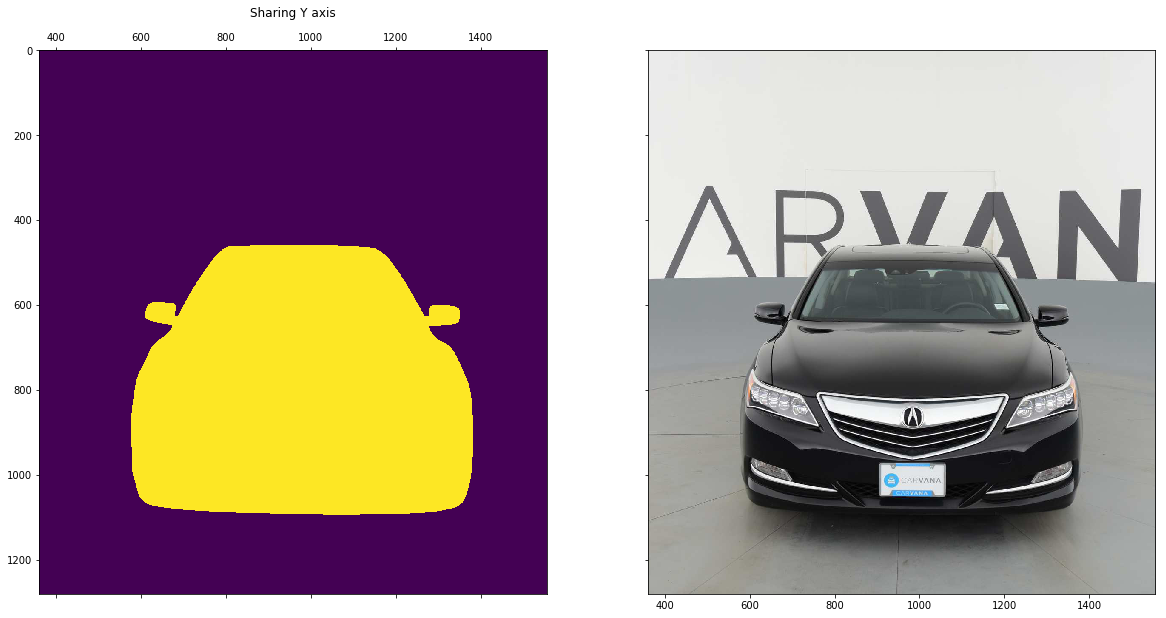

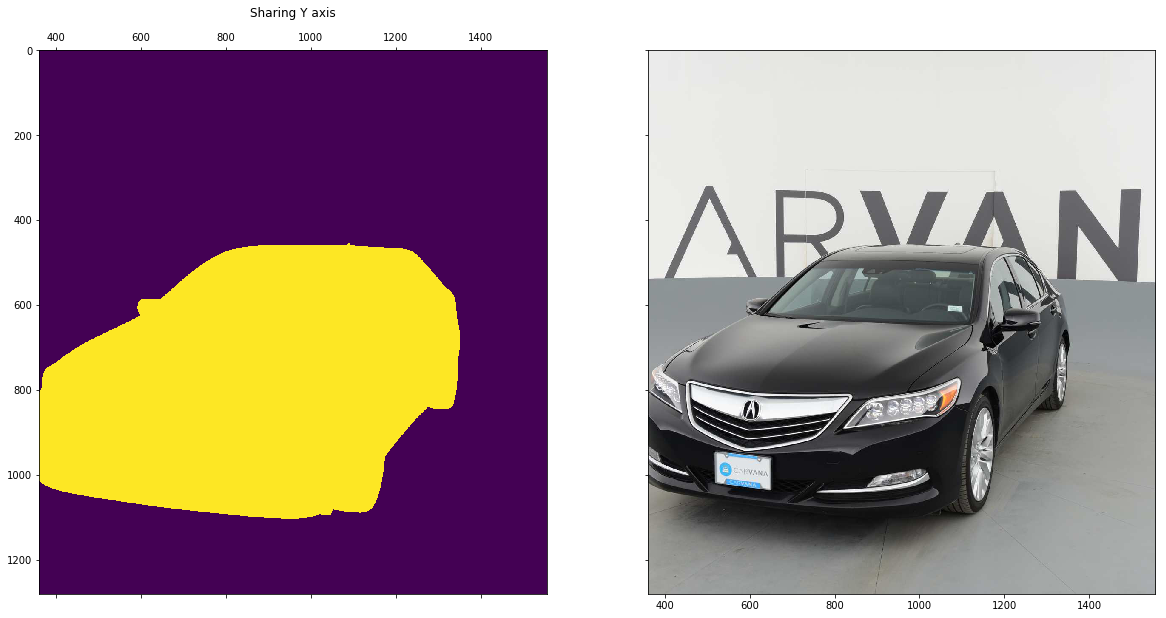

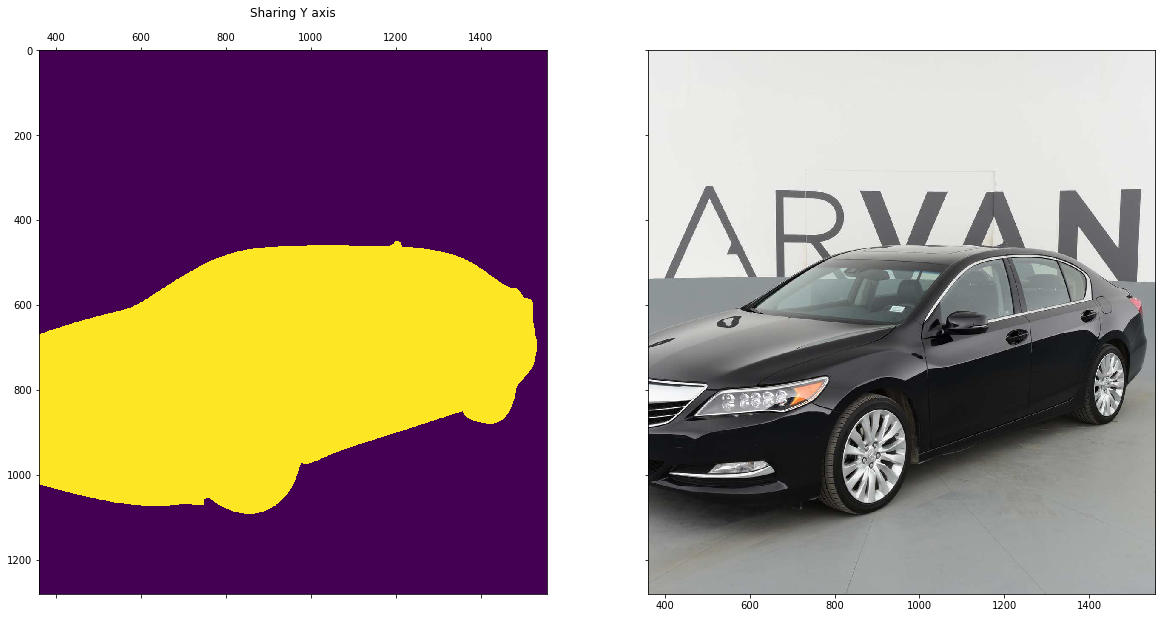

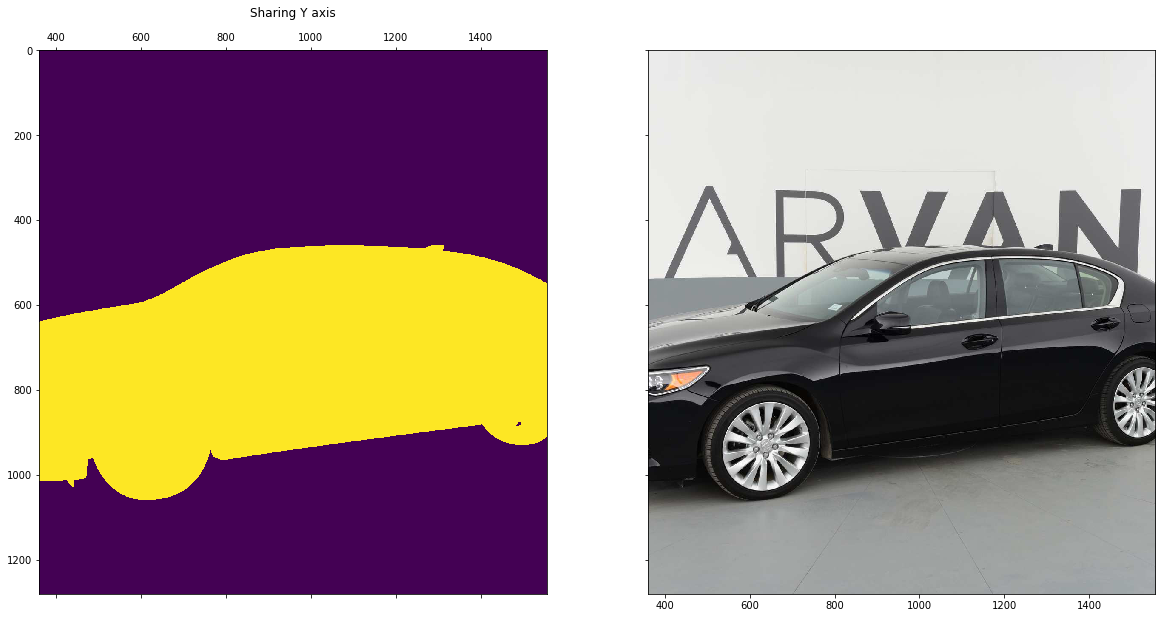

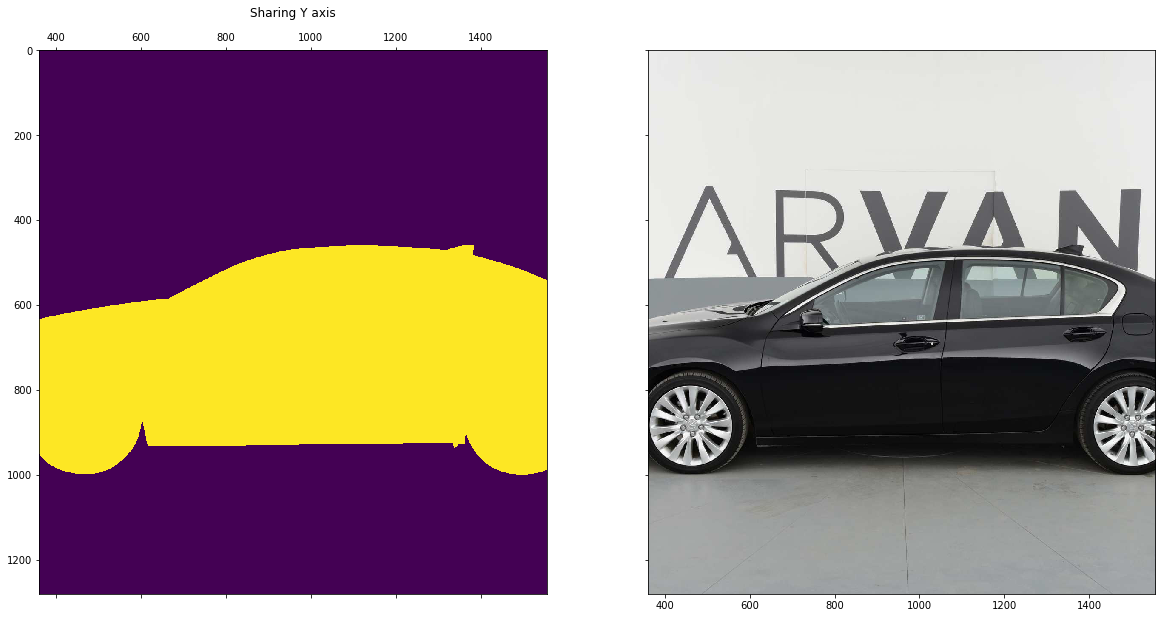

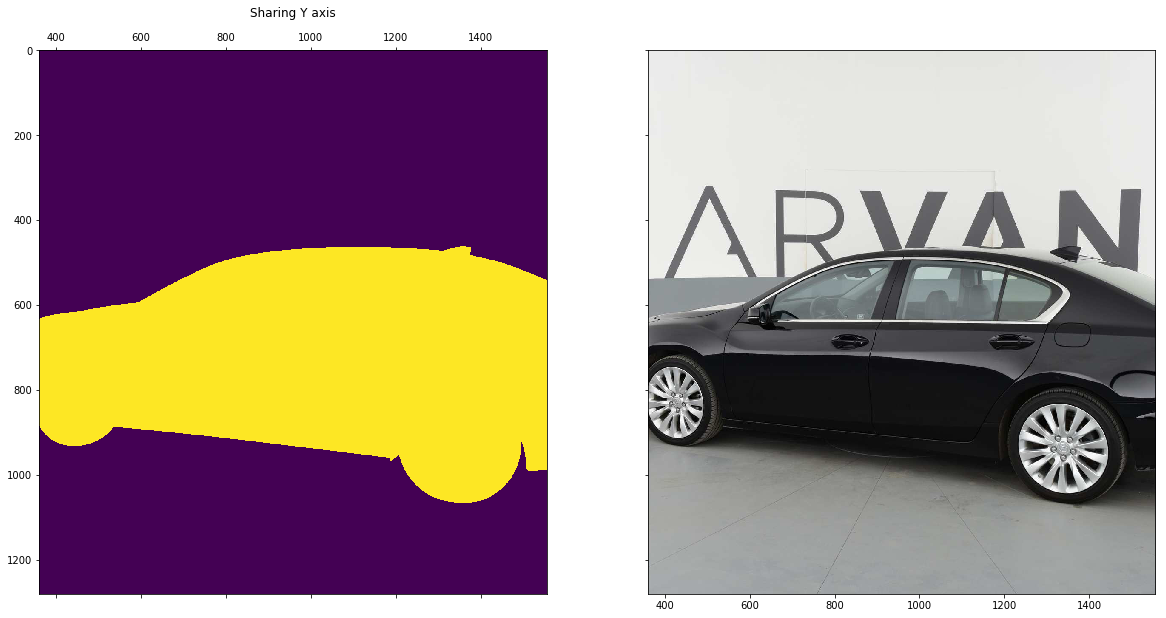

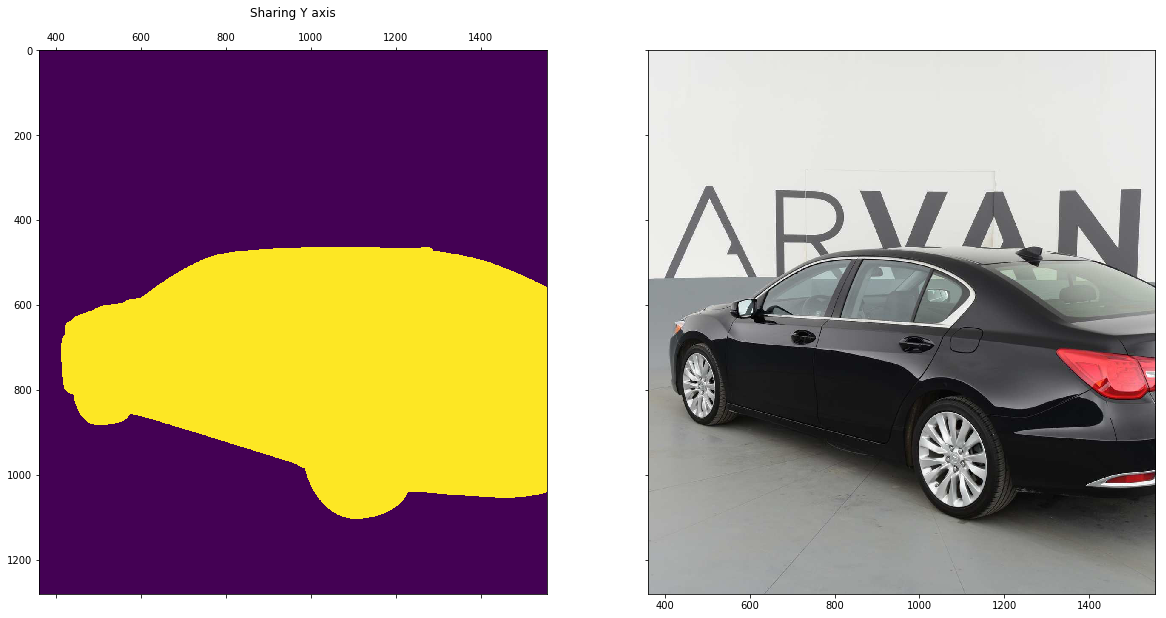

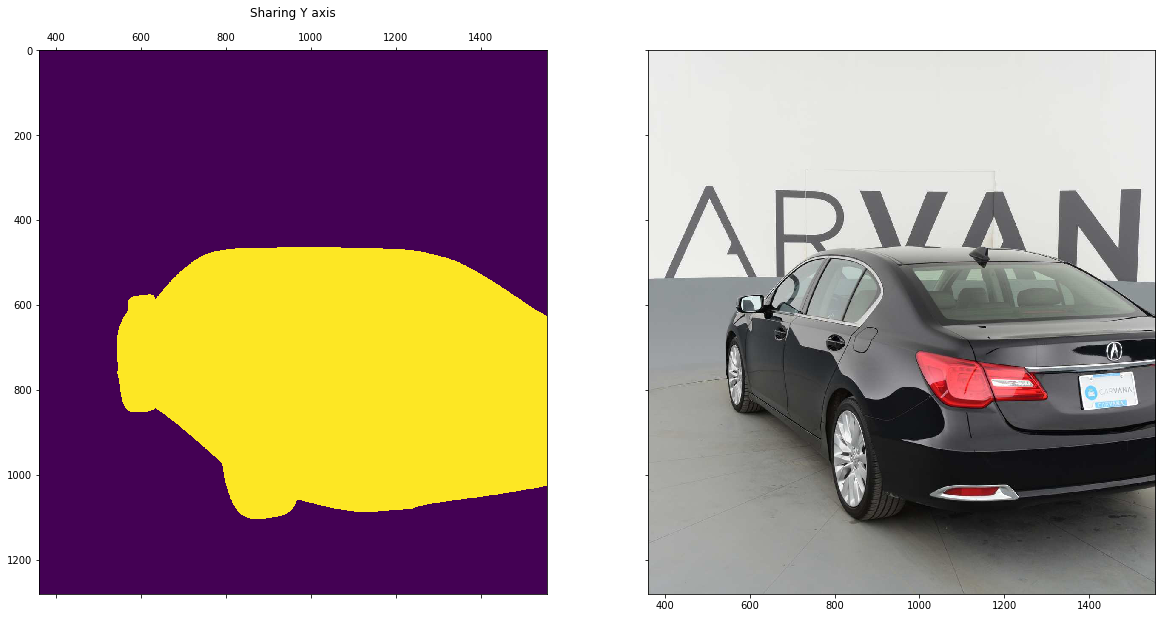

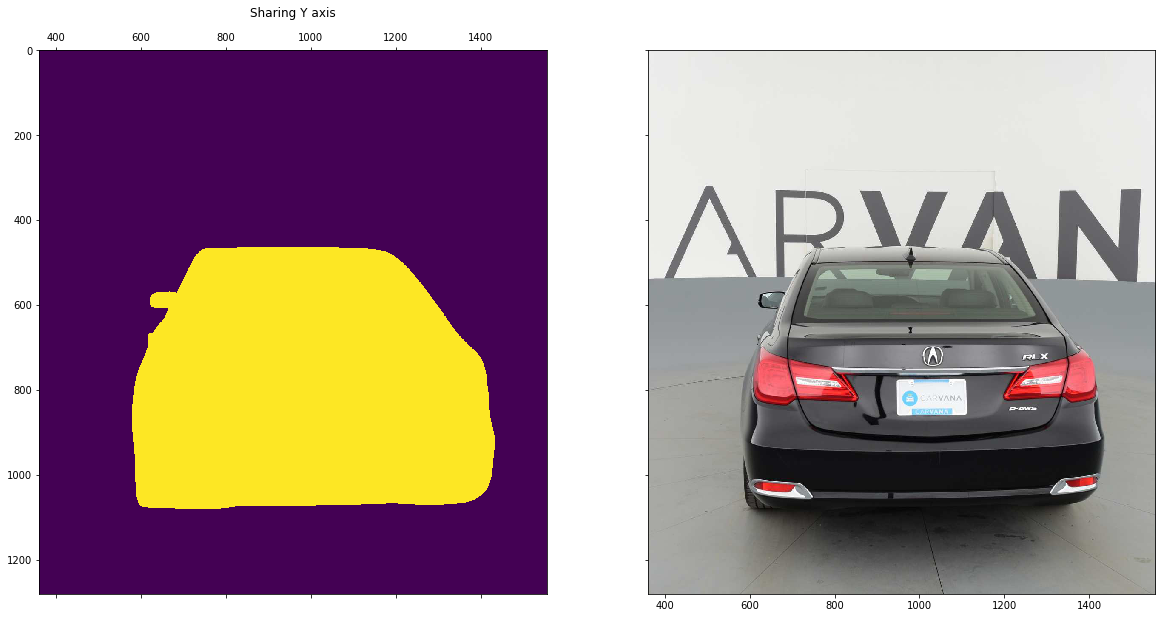

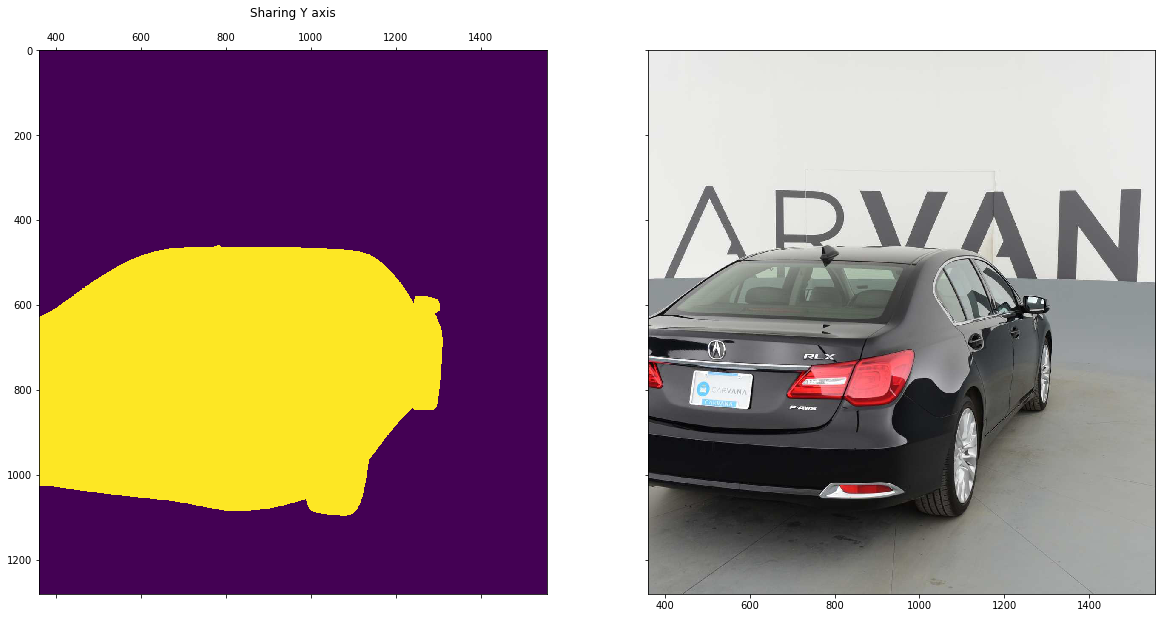

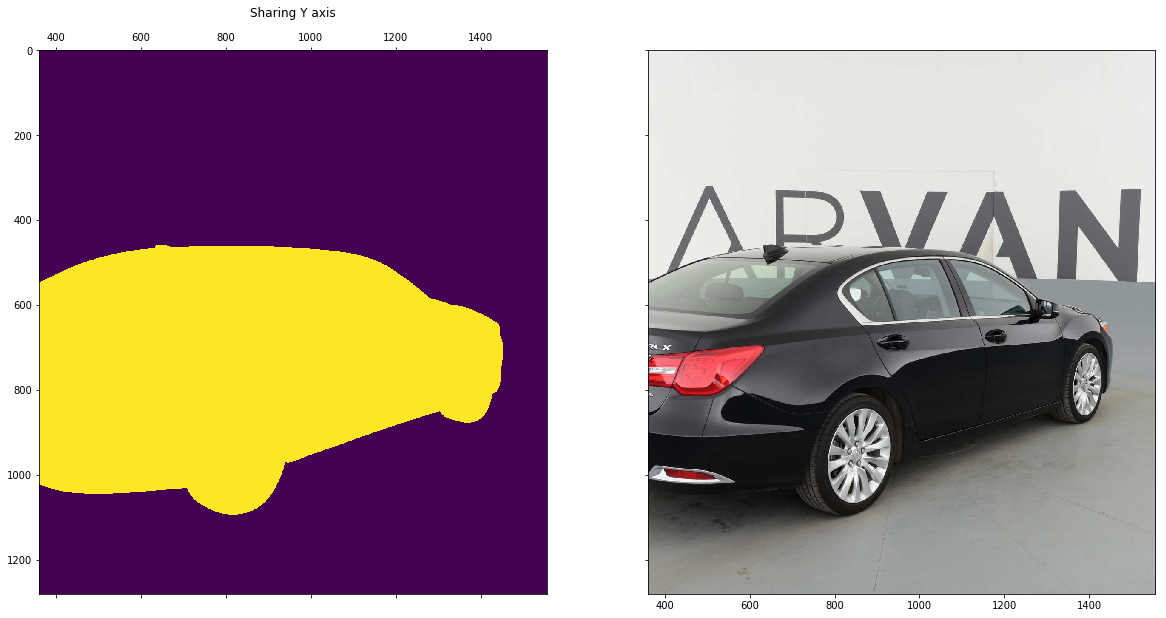

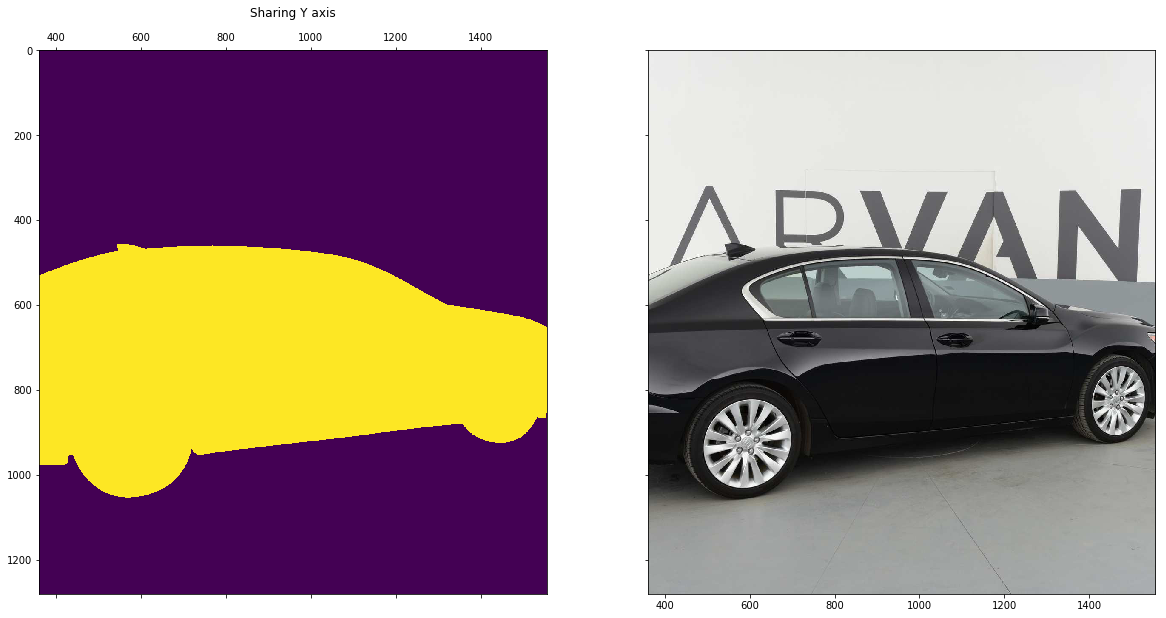

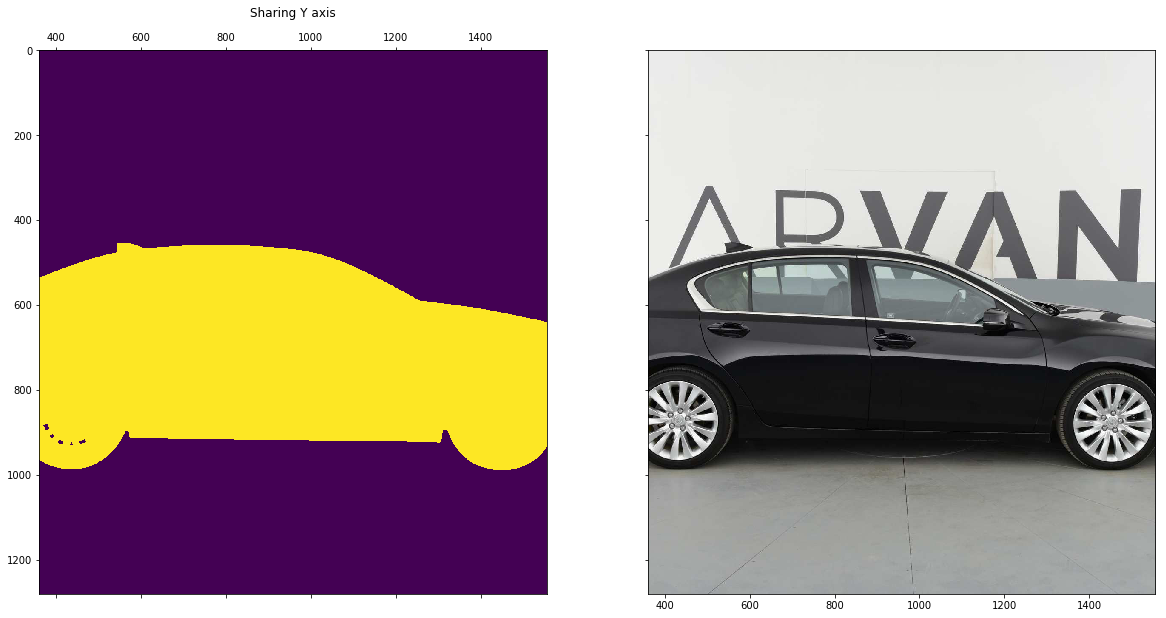

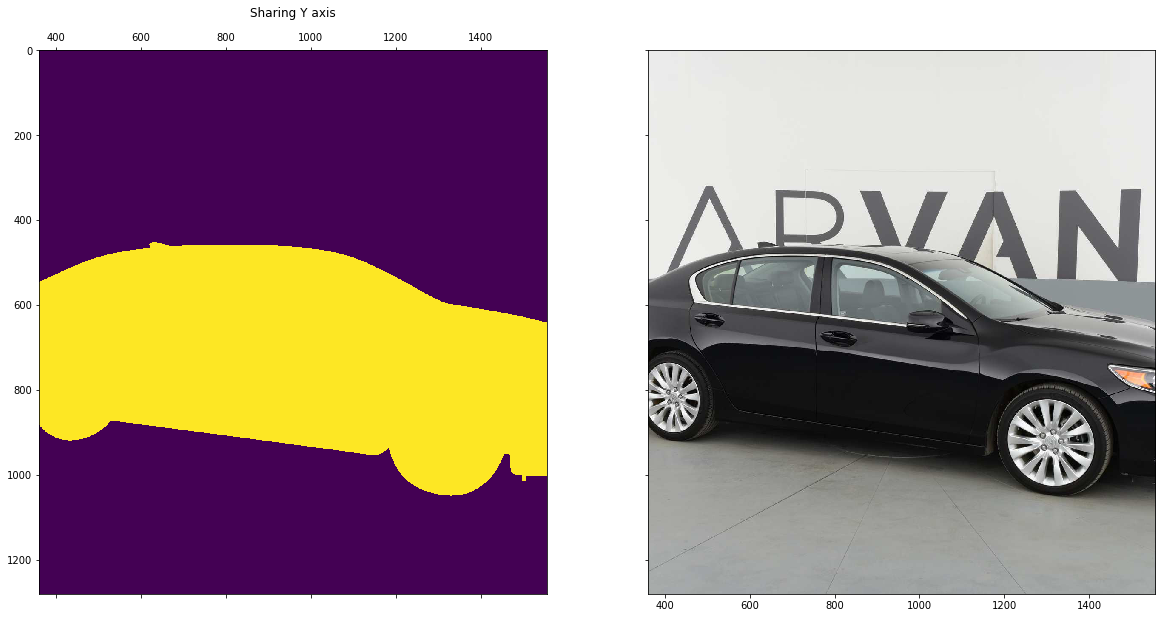

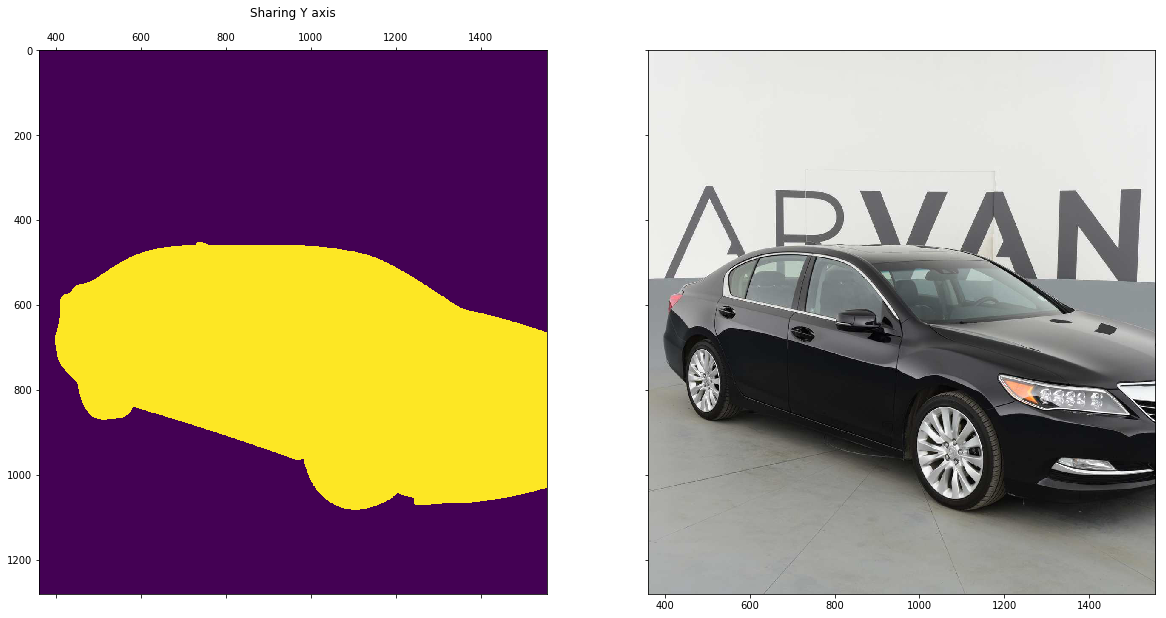

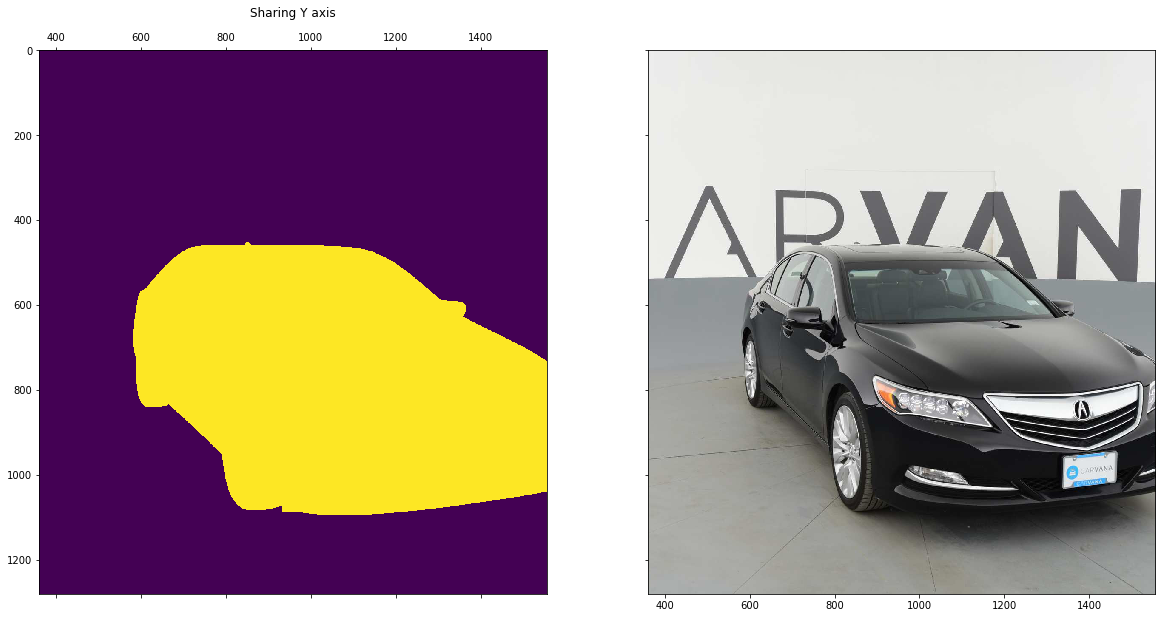

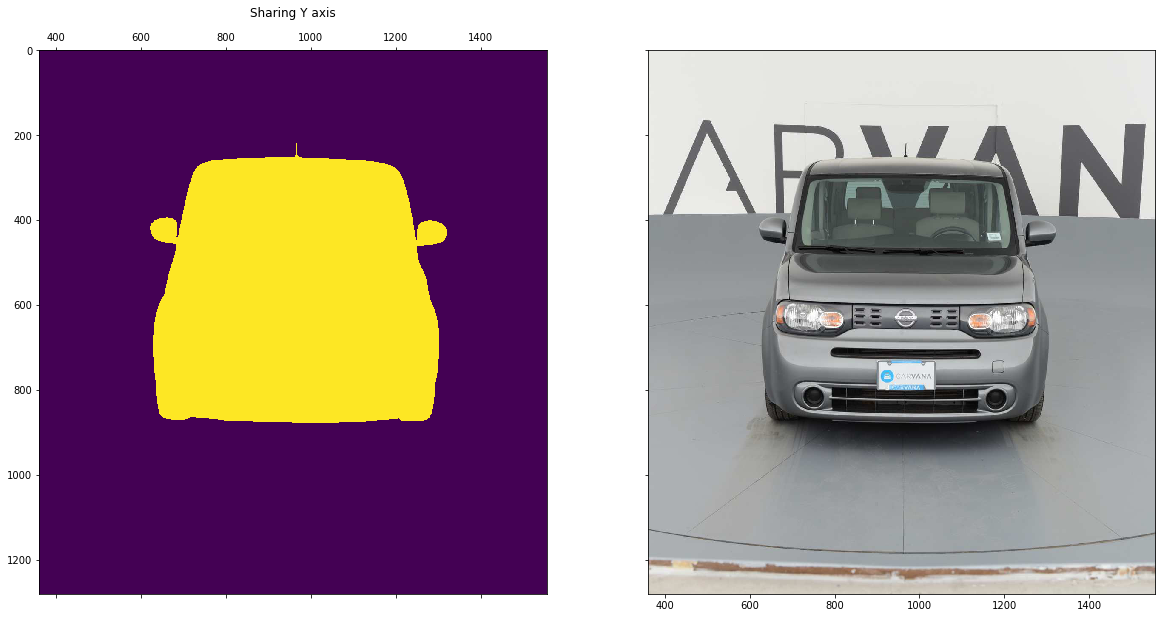

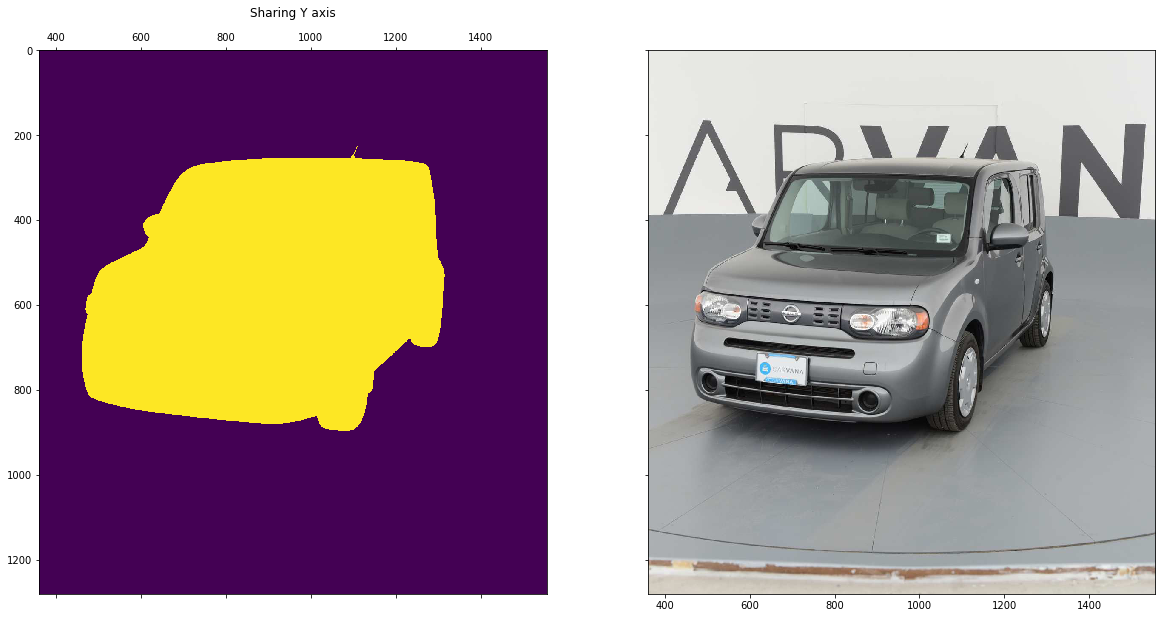

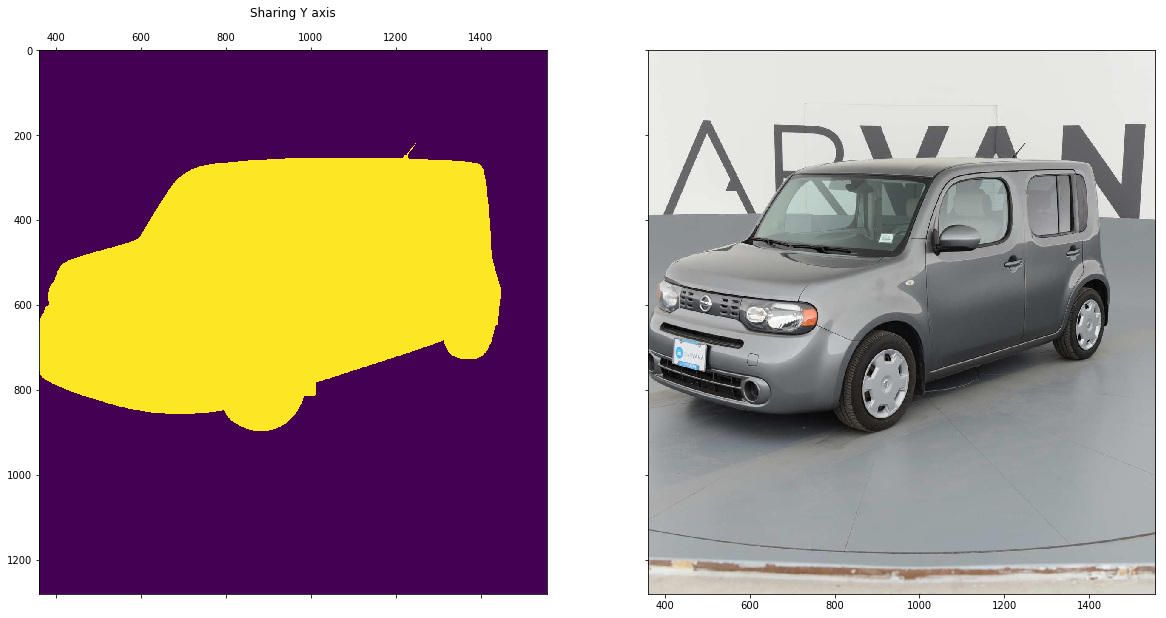

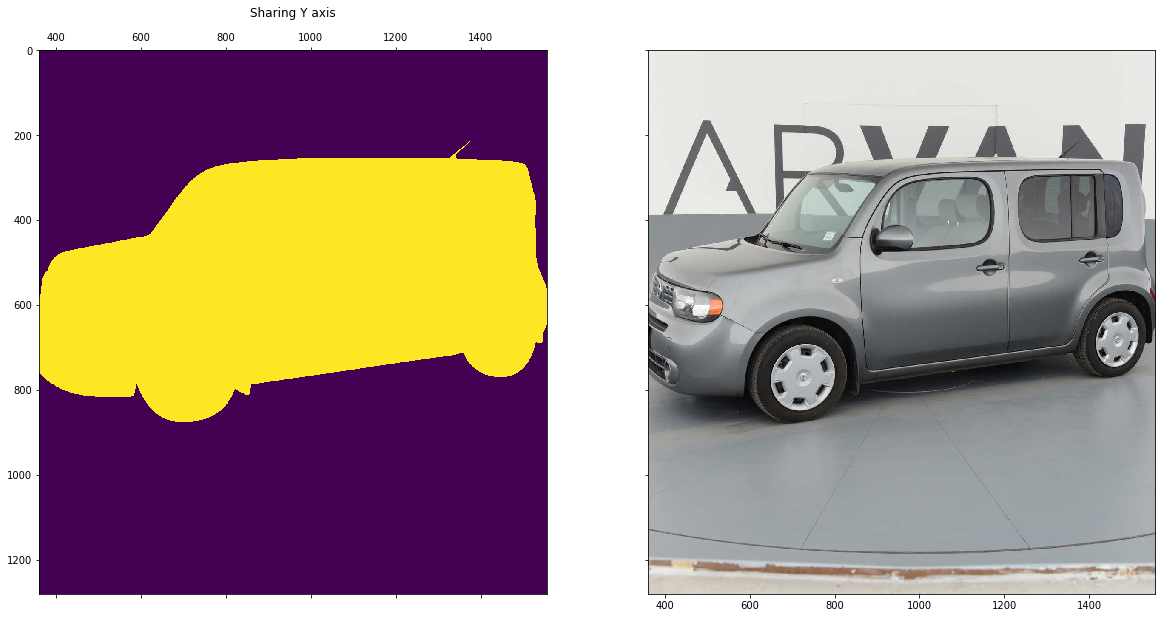

In [40]:
for i in range(20):
    # Two subplots, unpack the axes array immediately
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,10))
    ax1.set_title('Sharing Y axis')

    sample = rle_decode(masks.iloc[i]['rle_mask'], (1280,1918))
    ax1.matshow(sample)

    ax2.imshow(mpimg.imread('../data/train/'+masks.iloc[i]['img'], format='jpeg'))

    plt.show()